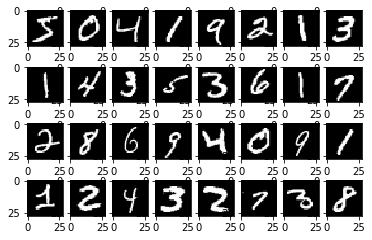

In [3]:
#MNISTデータを表示

import keras
from keras.datasets import mnist
from matplotlib import pyplot

#MNISTデータ読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#4x8に出力
for i in range(0,32):
    pyplot.subplot(4,8,i + 1)
    pyplot.imshow(x_train[i],cmap='gray')
    
pyplot.show()

In [4]:
#画像を数値で表示

x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.2495 - acc: 0.9225 - val_loss: 0.0985 - val_acc: 0.9680
Epoch 2/50
60000/60000 [==============================] - 11s 191us/step - loss: 0.1033 - acc: 0.9683 - val_loss: 0.0750 - val_acc: 0.9767
Epoch 3/50
60000/60000 [==============================] - 12s 198us/step - loss: 0.0755 - acc: 0.9768 - val_loss: 0.0774 - val_acc: 0.9771
Epoch 4/50
60000/60000 [==============================] - 12s 205us/step - loss: 0.0595 - acc: 0.9822 - val_loss: 0.0725 - val_acc: 0.9810
Epoch 5/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.0518 - acc: 0.9842 - val_loss: 0.0697 - val_acc: 0.9826
Epoch 6/50
60000/60000 [==============================] - 12s 197us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0760 - val_acc: 0.9803
Epoch 7/50
60000/60000 [==============================] - 12s 195us/step - loss: 0.0389 - acc: 0.9884 - val_loss: 0.

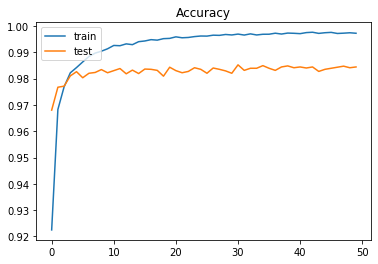

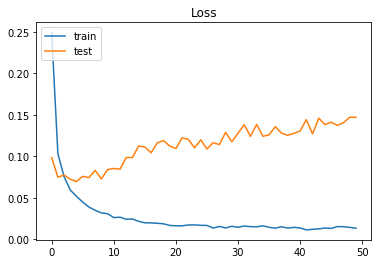

In [2]:
# MLPでMNISTの分類

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLPモデル構造を定義 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.2196 - acc: 0.9331 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0810 - acc: 0.9768 - val_loss: 0.0414 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0632 - acc: 0.9817 - val_loss: 0.0379 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0547 - acc: 0.9842 - val_loss: 0.0336 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0484 - acc: 0.9853 - val_loss: 0.0365 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0468 - acc: 0.9865 - val_loss: 0.0315 - val_acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0429 - acc: 0.9875 - val_loss: 0.0394 -

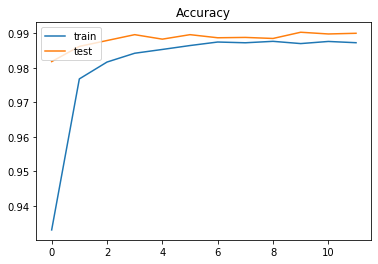

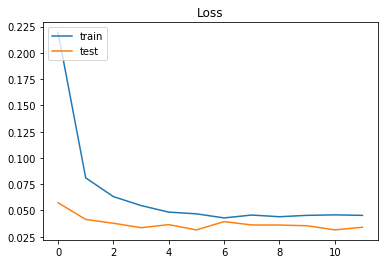

In [3]:
# CNNでMNISTの分類

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
im_rows = 28 # 画像の縦ピクセルサイズ
im_cols = 28 # 画像の横ピクセルサイズ
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_rows, im_cols, im_color)
out_size = 10

# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義
model = Sequential()
model.add(Conv2D(32, 
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



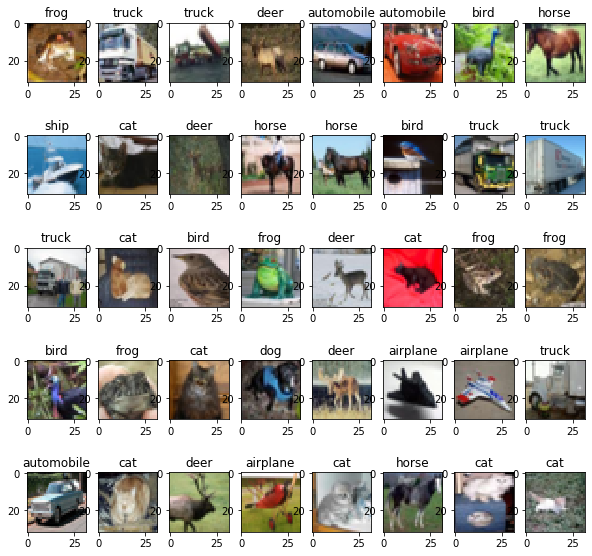

In [7]:
#CIFAR-10の画像を表示

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(0,40):
    img = Image.fromarray(x_train[i])
    plt.subplot(5,8,i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off")#x軸オフ
    plt.tick_params(labelleft="off",left="off")#y軸オフ
    plt.imshow(img)

plt.show()

In [8]:
#CIFAR-10の画像を数値で表示

x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [2]:
# MLPでCIFAR-10の画像を分類

import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを一次元配列に変換 
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行 
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 71s 1ms/step - loss: 1.8765 - acc: 0.3306 - val_loss: 1.8046 - val_acc: 0.3535
Epoch 2/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.6990 - acc: 0.3942 - val_loss: 1.6416 - val_acc: 0.4139
Epoch 3/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.6345 - acc: 0.4159 - val_loss: 1.6744 - val_acc: 0.4021
Epoch 4/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.5940 - acc: 0.4338 - val_loss: 1.5777 - val_acc: 0.4428
Epoch 5/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5622 - acc: 0.4431 - val_loss: 1.5654 - val_acc: 0.4492
Epoch 6/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5387 - acc: 0.4513 - val_loss: 1.6092 - val_acc: 0.4222
Epoch 7/50
50000/5000

50000/50000 [==============================] - 64s 1ms/step - loss: 1.3068 - acc: 0.5359 - val_loss: 1.5162 - val_acc: 0.4712
Epoch 40/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.2997 - acc: 0.5364 - val_loss: 1.4847 - val_acc: 0.4859
Epoch 41/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2936 - acc: 0.5391 - val_loss: 1.4961 - val_acc: 0.4743
Epoch 42/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2966 - acc: 0.5392 - val_loss: 1.5271 - val_acc: 0.4735
Epoch 43/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2855 - acc: 0.5421 - val_loss: 1.4932 - val_acc: 0.4791
Epoch 44/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2925 - acc: 0.5401 - val_loss: 1.4865 - val_acc: 0.4867
Epoch 45/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2823 - acc: 0.5435 - val_loss: 1.5145 - val_acc: 0.4734
Epoch 46/50
50000/50000 [=====================

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
#CNNでCIFAR-10の画像を分類

import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 233s 5ms/step - loss: 1.5409 - acc: 0.4336 - val_loss: 1.1817 - val_acc: 0.5766
Epoch 2/50
50000/50000 [==============================] - 233s 5ms/step - loss: 1.1295 - acc: 0.5985 - val_loss: 0.9454 - val_acc: 0.6692
Epoch 3/50
50000/50000 [==============================] - 232s 5ms/step - loss: 0.9690 - acc: 0.6598 - val_loss: 0.8892 - val_acc: 0.6887
Epoch 4/50
50000/50000 [==============================] - 231s 5ms/step - loss: 0.8749 - acc: 0.6916 - val_loss: 0.8130 - val_acc: 0.7139
Epoch 5/50
50000/50000 [==============================] - 232s 5ms/step - loss: 0.8138 - acc: 0.7156 - val_loss: 0.7422 - val_acc: 0.7456
Epoch 6/50
50000/50000 [============

50000/50000 [==============================] - 229s 5ms/step - loss: 0.4268 - acc: 0.8496 - val_loss: 0.6619 - val_acc: 0.7972
Epoch 34/50
50000/50000 [==============================] - 229s 5ms/step - loss: 0.4272 - acc: 0.8511 - val_loss: 0.6808 - val_acc: 0.7884
Epoch 35/50
50000/50000 [==============================] - 231s 5ms/step - loss: 0.4122 - acc: 0.8564 - val_loss: 0.6531 - val_acc: 0.7931
Epoch 36/50
50000/50000 [==============================] - 230s 5ms/step - loss: 0.4126 - acc: 0.8583 - val_loss: 0.6547 - val_acc: 0.8005
Epoch 37/50
50000/50000 [==============================] - 229s 5ms/step - loss: 0.4048 - acc: 0.8597 - val_loss: 0.6814 - val_acc: 0.7915
Epoch 38/50
50000/50000 [==============================] - 233s 5ms/step - loss: 0.4080 - acc: 0.8593 - val_loss: 0.6661 - val_acc: 0.7944
Epoch 39/50
50000/50000 [==============================] - 276s 6ms/step - loss: 0.4088 - acc: 0.8571 - val_loss: 0.6708 - val_acc: 0.7911
Epoch 40/50
50000/50000 [==============

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [3]:
model.save_weights('cifar10-mlp-weight.h5')

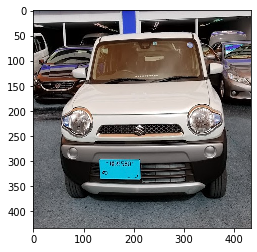

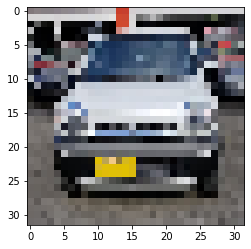

1/1 [==============================] - 0s 2ms/step
airplane = 3
automobile = 93
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 1
--------------------------
予測結果　:　 automobile


In [10]:
#自分で用意した画像を判定

import cv2
import numpy as np

labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
img_size = 32 * 32 * 3

#モデルデータ読み込み
model.load_weights('cifar10-mlp-weight.h5')

# OpenCVで画像読み込み

img = cv2.imread('test-car.jpg')
plt.imshow(img)
plt.show()

# 色空間を変換してリサイズ

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(32,32))

plt.imshow(img)
plt.show()

# MLPで学習したデータに合わせる

img = img.reshape(img_size).astype('float32') / 255

# 予測

r = model.predict(np.array([img]),batch_size=32,verbose=1)
res = r[0]

#表示

for i,acc in enumerate(res):
    print(labels[i], "=",int(acc * 100))
    
print("--------------------------")
print("予測結果　:　",labels[res.argmax()])


In [12]:
# ETL1Cのファイルを読み込む
import struct
from PIL import Image, ImageEnhance
import glob, os

# 出力ディレクトリ
outdir = "png-etl1/"
if not os.path.exists(outdir): os.mkdir(outdir)

# ETL1ディレクトリ以下のファイルを処理する
files = glob.glob("ETL1/*")
for fname in files:
    if fname == "ETL1/ETL1INFO": continue # 情報ファイルは飛ばす
    print(fname)
    # ETL1のデータファイルを開く
    f = open(fname, 'rb')
    f.seek(0)
    while True:
        # メタデータ＋画像データの組を一つずつ読む 
        s = f.read(2052)
        if not s: break
        # バイナリデータなのでPythonが理解できるように抽出
        r = struct.unpack('>H2sH6BI4H4B4x2016s4x', s)
        code_ascii = r[1]
        code_jis = r[3]
        # 画像データとして取り出す
        iF = Image.frombytes('F', (64, 63), r[18], 'bit', 4)
        iP = iF.convert('L')
        # 画像を鮮明にして保存
        dir = outdir + "/" + str(code_jis)
        if not os.path.exists(dir): os.mkdir(dir)
        fn = "{0:02x}-{1:02x}{2:04x}.png".format(code_jis, r[0], r[2])
        fullpath = dir + "/" + fn
        #if os.path.exists(fullpath): continue
        enhancer = ImageEnhance.Brightness(iP)
        iE = enhancer.enhance(16)
        iE.save(fullpath, 'PNG')
print("ok")


ETL1\ETL1C_01
ETL1\ETL1C_02
ETL1\ETL1C_03
ETL1\ETL1C_04
ETL1\ETL1C_05
ETL1\ETL1C_06
ETL1\ETL1C_07
ETL1\ETL1C_08
ETL1\ETL1C_09
ETL1\ETL1C_10
ETL1\ETL1C_11
ETL1\ETL1C_12
ETL1\ETL1C_13
ETL1\ETL1INFO


error: unpack requires a buffer of 2052 bytes

dir= ./png-etl1/177
dir= ./png-etl1/178
dir= ./png-etl1/179
dir= ./png-etl1/180
dir= ./png-etl1/181
dir= ./png-etl1/182
dir= ./png-etl1/183
dir= ./png-etl1/184
dir= ./png-etl1/185
dir= ./png-etl1/186
dir= ./png-etl1/187
dir= ./png-etl1/188
dir= ./png-etl1/189
dir= ./png-etl1/190
dir= ./png-etl1/191
dir= ./png-etl1/192
dir= ./png-etl1/193
dir= ./png-etl1/194
dir= ./png-etl1/195
dir= ./png-etl1/196
dir= ./png-etl1/197
dir= ./png-etl1/198
dir= ./png-etl1/199
dir= ./png-etl1/200
dir= ./png-etl1/201
dir= ./png-etl1/202
dir= ./png-etl1/203
dir= ./png-etl1/204
dir= ./png-etl1/205
dir= ./png-etl1/206
dir= ./png-etl1/207
dir= ./png-etl1/208
dir= ./png-etl1/209
dir= ./png-etl1/210
dir= ./png-etl1/211
dir= ./png-etl1/212
dir= ./png-etl1/213
dir= ./png-etl1/214
dir= ./png-etl1/215
dir= ./png-etl1/216
dir= ./png-etl1/217
dir= ./png-etl1/218
dir= ./png-etl1/219
dir= ./png-etl1/220
dir= ./png-etl1/166
dir= ./png-etl1/221


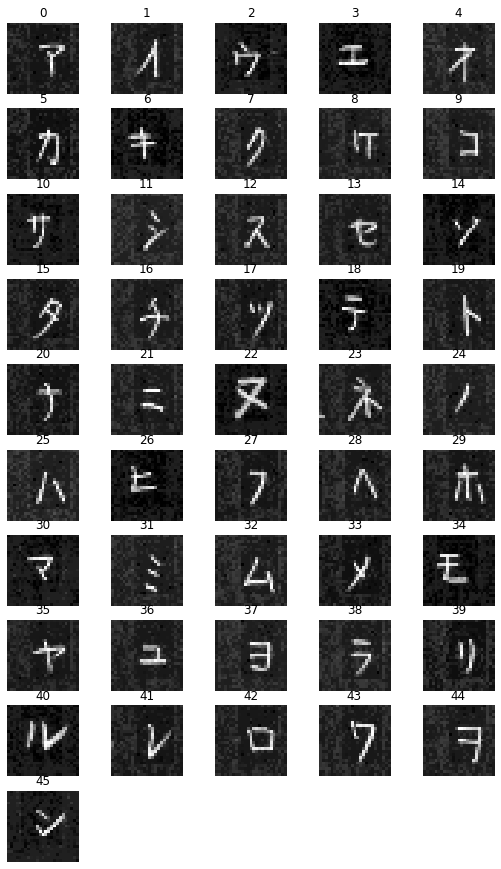

ok


In [13]:
# ETL1の画像をリサイズ

import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

# 保存先や画像サイズの指定 
out_dir = "./png-etl1" # 画像データがあるディレクトリ
im_size = 25 # 画像サイズ
save_file = out_dir + "/katakana.pickle" # 保存先
plt.figure(figsize=(9, 17)) # 出力画像を大きくする

# カタカナの画像が入っているディレクトリから画像を取得 
kanadir = list(range(177, 220+1))
kanadir.append(166) # ヲ
kanadir.append(221) # ン
result = []
for i, code in enumerate(kanadir):
    img_dir = out_dir + "/" + str(code)
    fs = glob.glob(img_dir + "/*")
    print("dir=",  img_dir)
    # 画像を読み込んでグレイスケールに変換しリサイズする 
    for j, f in enumerate(fs):
        img = cv2.imread(f)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img_gray, (im_size, im_size))
        result.append([i, img])
        # Jupyter Notebookで画像を出力
        if j == 3:
            plt.subplot(11, 5, i + 1)
            plt.axis("off")
            plt.title(str(i))
            plt.imshow(img, cmap='gray')
# ラベルと画像のデータを保存 
pickle.dump(result, open(save_file, "wb"))
plt.show()
print("ok")


In [14]:
#　単純なニューラルネットワークでカタカナ分析


import numpy as np
import cv2, pickle
from sklearn.model_selection import train_test_split
import keras

# データファイルと画像サイズの指定 
data_file = "./png-etl1/katakana.pickle"
im_size = 25
in_size = im_size * im_size
out_size = 46 # ア-ンまでの文字の数

# 保存した画像データ一覧を読み込む
data = pickle.load(open(data_file, "rb"))

# 画像データを0-1の範囲に直す 
y = []
x = []
for d in data:
    (num, img) = d
    img = img.reshape(-1).astype('float') / 255
    y.append(keras.utils.np_utils.to_categorical(num, out_size))
    x.append(img)
x = np.array(x)
y = np.array(y)

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# モデル構造を定義 
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイルして学習を実行
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.fit(x_train, y_train,
    batch_size=20, epochs=50, verbose=1,
    validation_data=(x_test, y_test))

# モデルを評価 
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])




Train on 55309 samples, validate on 13828 samples
Epoch 1/50
55309/55309 [==============================] - 32s 574us/step - loss: 2.2442 - acc: 0.4311 - val_loss: 1.3756 - val_acc: 0.6520
Epoch 2/50
55309/55309 [==============================] - 30s 541us/step - loss: 1.0304 - acc: 0.7312 - val_loss: 0.8700 - val_acc: 0.7710
Epoch 3/50
55309/55309 [==============================] - 28s 514us/step - loss: 0.6804 - acc: 0.8197 - val_loss: 0.6458 - val_acc: 0.8296
Epoch 4/50
55309/55309 [==============================] - 32s 580us/step - loss: 0.5220 - acc: 0.8608 - val_loss: 0.5465 - val_acc: 0.8529
Epoch 5/50
55309/55309 [==============================] - 31s 561us/step - loss: 0.4321 - acc: 0.8826 - val_loss: 0.4971 - val_acc: 0.8660
Epoch 6/50
55309/55309 [==============================] - 30s 542us/step - loss: 0.3651 - acc: 0.9012 - val_loss: 0.4862 - val_acc: 0.8663
Epoch 7/50
55309/55309 [==============================] - 31s 568us/step - loss: 0.3137 - acc: 0.9153 - val_loss: 0.

Train on 55309 samples, validate on 13828 samples
Epoch 1/12
55309/55309 [==============================] - 89s 2ms/step - loss: 1.9519 - acc: 0.4664 - val_loss: 0.6654 - val_acc: 0.8275
Epoch 2/12
55309/55309 [==============================] - 86s 2ms/step - loss: 0.8626 - acc: 0.7415 - val_loss: 0.4501 - val_acc: 0.8784
Epoch 3/12
55309/55309 [==============================] - 86s 2ms/step - loss: 0.6279 - acc: 0.8129 - val_loss: 0.3437 - val_acc: 0.9096
Epoch 4/12
55309/55309 [==============================] - 86s 2ms/step - loss: 0.5119 - acc: 0.8488 - val_loss: 0.3035 - val_acc: 0.9183
Epoch 5/12
55309/55309 [==============================] - 86s 2ms/step - loss: 0.4390 - acc: 0.8716 - val_loss: 0.2595 - val_acc: 0.9314
Epoch 6/12
55309/55309 [==============================] - 87s 2ms/step - loss: 0.3960 - acc: 0.8846 - val_loss: 0.2198 - val_acc: 0.9458
Epoch 7/12
55309/55309 [==============================] - 86s 2ms/step - loss: 0.3578 - acc: 0.8983 - val_loss: 0.2128 - val_acc

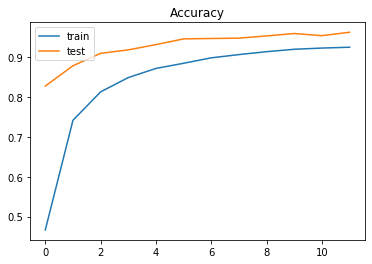

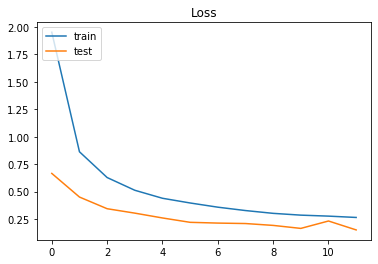

In [2]:
#　CNNでカタカナ分析

import numpy as np
import cv2, pickle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt

# データファイルと画像サイズの指定
data_file = "./png-etl1/katakana.pickle"
im_size = 25
out_size = 46 # ア-ンまでの文字の数
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_size, im_size, im_color)

# カタカナ画像のデータセットを読み込む
data = pickle.load(open(data_file, "rb"))
# 画像データを変形して0-1の範囲に直す 
y = []
x = []
for d in data:
    (num, img) = d
    img = img.astype('float').reshape(
      im_size, im_size, im_color) / 255
    y.append(keras.utils.np_utils.to_categorical(num, out_size))
    x.append(img)
x = np.array(x)
y = np.array(y)

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# CNNモデル構造を定義
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行して評価 
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

